## Ejercicio 8: Ejemplo de regularización L1 y L2 en Regresión lineal

Utilizaremos el dataset Boston Housing, una base de datos clásica de regresión. Este dataset contiene información sobre el valor medio de las viviendas en diferentes áreas de Boston y se utiliza frecuentemente para ilustrar problemas de regresión.

El dataset Boston Housing contiene 13 características (variables independientes) y una variable objetivo (el precio medio de las viviendas en miles de dólares):


CRIM:	Tasa de criminalidad per cápita por ciudad.\
ZN:	    Proporción de suelo residencial zonificado para parcelas de más de 25,000 pies cuadrados.\
INDUS:	Proporción de acres comerciales no minoristas por ciudad.\
CHAS:	Variable binaria: 1 si el tramo limita con el río Charles; 0 en caso contrario.\
NOX:	Concentración de óxidos de nitrógeno (partes por 10 millones).\
RM:	    Número promedio de habitaciones por vivienda.\
AGE:    Proporción de unidades ocupadas construidas antes de 1940.\
DIS:	Distancias ponderadas a cinco centros de empleo en Boston.\
RAD:	Índice de accesibilidad a carreteras radiales.\
TAX:	Tasa de impuestos a la propiedad por cada $10,000.\
PTRATIO:Proporción estudiante-profesor por ciudad.\
B:      Proporción de personas afroamericanas por ciudad.\
LSTAT:	Porcentaje de estatus inferior de la población.\
PRICE:	Variable objetivo: Valor medio de las viviendas ocupadas por propietarios en miles de dólares.

Coeficientes sin regularización: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Coeficientes con Ridge (L2): [-0.1284272   0.03695233  0.01791436  2.93269454 -7.84806046  4.06357438
 -0.01724174 -1.27176091  0.22549398 -0.00938149 -0.82710453  0.01198771
 -0.56347377]
Coeficientes con Lasso (L1): [-1.22854422e-01  3.86385849e-02 -4.97188385e-04  1.48353759e+00
 -0.00000000e+00  3.89367421e+00 -1.96048179e-02 -1.10561397e+00
  2.16673479e-01 -1.05844004e-02 -7.44014516e-01  1.23959059e-02
 -6.02281637e-01]

Error cuadrático medio (Linear): 21.51744423117749
Error cuadrático medio (Ridge): 22.044053089860988
Error cuadrático medio (Lasso): 22.96383361575593


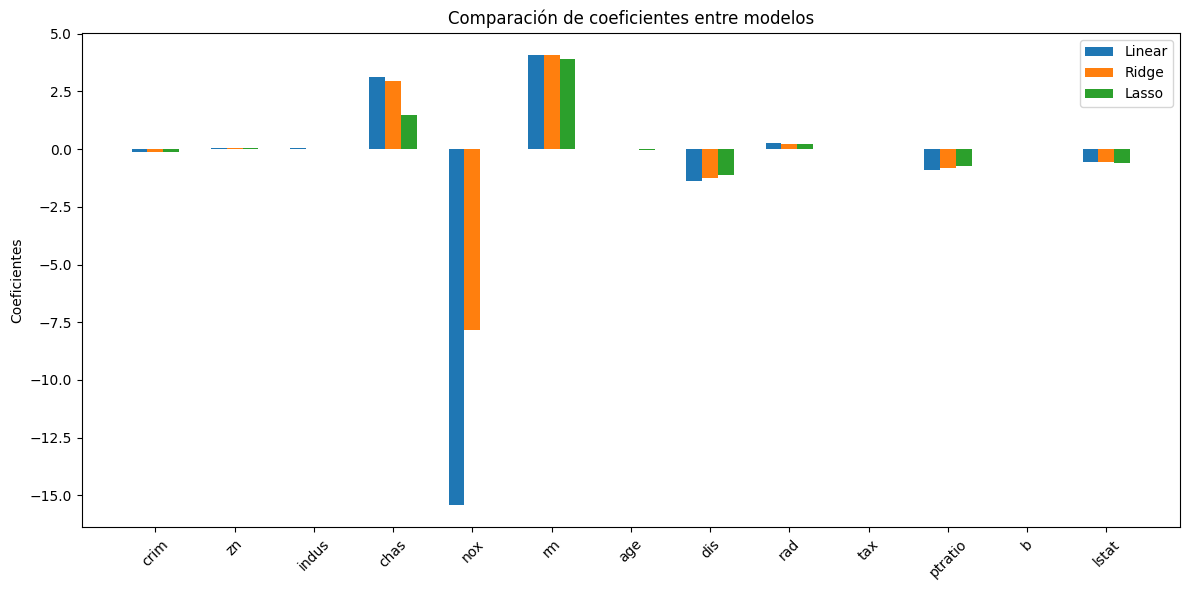

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Cargar los datos desde el archivo CSV
df = pd.read_csv('data/BostonHousing.csv')
X = df.drop(columns=['PRICE']).values  # Características
y = df['PRICE'].values  # Variable objetivo

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo sin regularización (Regresión Lineal)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Modelo con regularización L2 (Ridge)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Modelo con regularización L1 (Lasso)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluar los modelos
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Comparación de los coeficientes
print("Coeficientes sin regularización:", linear_model.coef_)
print("Coeficientes con Ridge (L2):", ridge_model.coef_)
print("Coeficientes con Lasso (L1):", lasso_model.coef_)

# Imprimir los errores cuadráticos medios
print("\nError cuadrático medio (Linear):", mse_linear)
print("Error cuadrático medio (Ridge):", mse_ridge)
print("Error cuadrático medio (Lasso):", mse_lasso)

# Visualización de los coeficientes
labels = df.columns[:-1]  # Nombres de las características (sin la columna 'PRICE')
x = np.arange(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, linear_model.coef_, width=0.2, label='Linear')
plt.bar(x, ridge_model.coef_, width=0.2, label='Ridge')
plt.bar(x + 0.2, lasso_model.coef_, width=0.2, label='Lasso')
plt.xticks(x, labels, rotation=45)
plt.ylabel('Coeficientes')
plt.title('Comparación de coeficientes entre modelos')
plt.legend()
plt.tight_layout()
plt.show()


Valores del coeficiente asociado a cada caracteristica en cada caso

Algunos coeficientes pueden ser cero o muy cercanos a cero debido a la irrelevancia de ciertas características.

Con Lasso (L1), la regularización puede llevar algunos coeficientes exactamente a cero, lo que es su característica principal. Lasso elimina características que no son útiles para el modelo, asignándoles un coeficiente de cero. (caracteristicas que no correlacionan con el objetivo o que son redundantes. En este último caso, de tener que elegir, en general se queda con aquella de menor varianza. Datos más concentrados)

Con Ridge (L2), la regularización no elimina coeficientes, pero sí los reduce. Sin embargo, puede suceder que algunos coeficientes se vuelvan muy pequeños, y esto podría parecer que están cerca de cero, pero no exactamente igual a cero (dependiendo de la magnitud de la regularización).

¿Es normal que el MSE Ridge sea ligeramente menor que el Lasso? Si, es normal. Ridge suaviza más los valores de los paramentros

Si MSE del modelo regularizado (Ridge o Lasso) es ligeramente más alto que el MSE del modelo sin regularización, pero el modelo regularizado muestra un mejor desempeño general (es decir, mejor rendimiento en datos no vistos o mayor estabilidad en su predicción), podríamos concluir que la regularización ha ayudado a mejorar la generalización. 